 #  <div style="text-align: center">  Tweets Analysis: Hillary vs Trump </div> 
####  <div style="text-align: center">- Buzzwords for each candidate</div> 
####  <div style="text-align: center">- Sentiment Analysis</div> 
####  <div style="text-align: center">- Impersonating the Candidates with Markov Chains</div> 
####  <div style="text-align: center">- Predict the tweet author</div> 

<img src='https://www.maxqda.com/wp/wp-content/uploads/sites/2/Blog-Twitter2.png'>

### <div style="text-align:center"> Kernel By: <b> Kamal Chouhbi</b></div>

 <a id="top"></a> <br>
## Notebook  Content
1. [Introduction](#1)
1. [Load packages](#2)
    1. [import](#21)
    1. [Setup](#22)
    1. [Version](#23)
1. [Exploratory Data Analysis](#3)
1. [Data Manipulation](#4)
   1. [Tweets over time](#41)
   1. [Percentage of retweets](#42)
   1. [Tweets Language](#43)
   1. [Original authors of retweets](#44)
1. [Data Analysis](#5)
   1. [Word Cloud](#51)
   1. [Mentions](#52)
   1. [Hashtags Wars](#53)
1. [Sentiment Analysis](#6)
1. [Impersonating the candidates](#7)
1. [Predicting who said it: Trump or Clinton](#8)


 <a id="1"></a> <br>
# 1- Introduction

<img src="http://si.wsj.net/public/resources/images/OG-AH736_Twitte_G_20160718163322.jpg" width="500">

Now let's focus on the cases of the two then-front runners for the 2016 U.S. presidential election: **Donald Trump and Hillary Clinton**, the present study examines differences in the ways in which they self-present and communicate with voters through their **Twitter** account.

One of the major battlegrounds of the 2016 presidential election was **Twitter**. It was one of the most publicized US Presidential Election in the history and **Twitter** had played an increasingly prominent role in it.

 <a id="2"></a> <br>
 # 2- Load packages
  <a id="21"></a> <br>
## 2-A Import

In [92]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import  accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,  TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.lancaster import LancasterStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import Pipeline
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from pandas import Series
import networkx as nx
from PIL import Image
import seaborn as sns
import datetime as dt
import nltk, string
import pandas as pd
import numpy as np
import nltk as nlp
import datetime
import warnings
import calendar
import sys
import os
import re

 <a id="22"></a> <br>
##  2-B Setup

In [2]:
%matplotlib inline
%precision 4
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
np.set_printoptions(suppress=True)
pd.set_option("display.precision", 15)

 <a id="23"></a> <br>
## 2-C Version

In [3]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('Python: {}'.format(sys.version))

pandas: 0.24.2
numpy: 1.16.2
Python: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]


 <a id="3"></a> <br>
# 3. Exploratory Data Analysis

This dataset contains the tweet ids of approximately 20 million tweets related to the 2016 United States presidential election. They were collected between July 13, 2016 and November 10, 2016 from the Twitter API using <a href="https://gwu-libraries.github.io/sfm-ui/">Social Feed Manager</a>.

I used a Tweets dataset which contain **~3000** recent tweets from **Hillary Clinton** and **Donald Trump**, the two major-party presidential nominees.

In [4]:
data = pd.read_csv('Data/tweets.csv')
print(data.shape)
data.head()

(6444, 28)


,id,handle,text,is_retweet,original_author,time,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,is_quote_status,...,place_type,place_country_code,place_country,place_contained_within,place_attributes,place_bounding_box,source_url,truncated,entities,extended_entities
0,780925634159796224,HillaryClinton,The question in this election: Who can put the...,False,NaN,2016-09-28T00:22:34,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Xr...,{'media': [{'display_url': 'pic.twitter.com/Xr...
1,780916180899037184,HillaryClinton,"Last night, Donald Trump said not paying taxes...",True,timkaine,2016-09-27T23:45:00,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,http://twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/t0...,{'media': [{'display_url': 'pic.twitter.com/t0...
2,780911564857761793,HillaryClinton,Couldn't be more proud of @HillaryClinton. Her...,True,POTUS,2016-09-27T23:26:40,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [{'id_str': '1536791610', 'n...",NaN
3,780907038650068994,HillaryClinton,"If we stand together, there's nothing we can't...",False,NaN,2016-09-27T23:08:41,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://studio.twitter.com,False,{'media': [{'display_url': 'pic.twitter.com/Q3...,{'media': [{'display_url': 'pic.twitter.com/Q3...
4,780897419462602752,HillaryClinton,Both candidates were asked about how they'd co...,False,NaN,2016-09-27T22:30:27,NaN,NaN,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,https://about.twitter.com/products/tweetdeck,False,"{'user_mentions': [], 'symbols': [], 'urls': [...",NaN


So we have 28 columns. Let's check the names

In [5]:
data.columns

Index(['id', 'handle', 'text', 'is_retweet', 'original_author', 'time',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'is_quote_status', 'lang', 'retweet_count',
       'favorite_count', 'longitude', 'latitude', 'place_id',
       'place_full_name', 'place_name', 'place_type', 'place_country_code',
       'place_country', 'place_contained_within', 'place_attributes',
       'place_bounding_box', 'source_url', 'truncated', 'entities',
       'extended_entities'],
      dtype='object')

In [6]:
data['time_decoded'] = pd.to_datetime(data.time)
data['time_decoded'] = data.time_decoded.map(lambda x: x.strftime('%Y-%m-%d'))
data[['time', 'time_decoded']].head()

,time,time_decoded
0,2016-09-28T00:22:34,2016-09-28
1,2016-09-27T23:45:00,2016-09-27
2,2016-09-27T23:26:40,2016-09-27
3,2016-09-27T23:08:41,2016-09-27
4,2016-09-27T22:30:27,2016-09-27


HillaryClinton     3226
realDonaldTrump    3218
Name: handle, dtype: int64


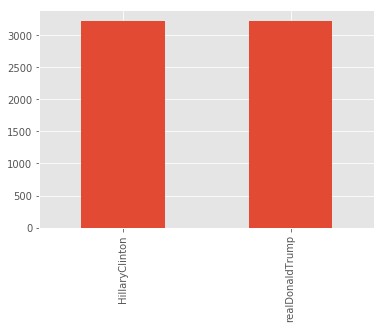

In [7]:
# Let's check if the data is balanced
print(data.handle.value_counts())
data.handle.value_counts().plot(kind='bar')

So we have approximately the same number of tweets for the two candidates. We can say that our data set is well balanced.

 <a id="4"></a> <br>
 # 4. Data Manipulation

 <a id="41"></a> <br>
 ## 4.1 Tweets over time
 Now, I'll add a new variable that will help me calculate the number of tweets for each candidate per day.

In [8]:
data['count']=1
grouped = data.groupby(['time_decoded', 'handle'])
grouped = grouped['count'].sum().reset_index()
grouped.head()

,time_decoded,handle,count
0,2016-01-05,realDonaldTrump,9
1,2016-01-06,realDonaldTrump,18
2,2016-01-07,realDonaldTrump,14
3,2016-01-08,realDonaldTrump,14
4,2016-01-09,realDonaldTrump,10


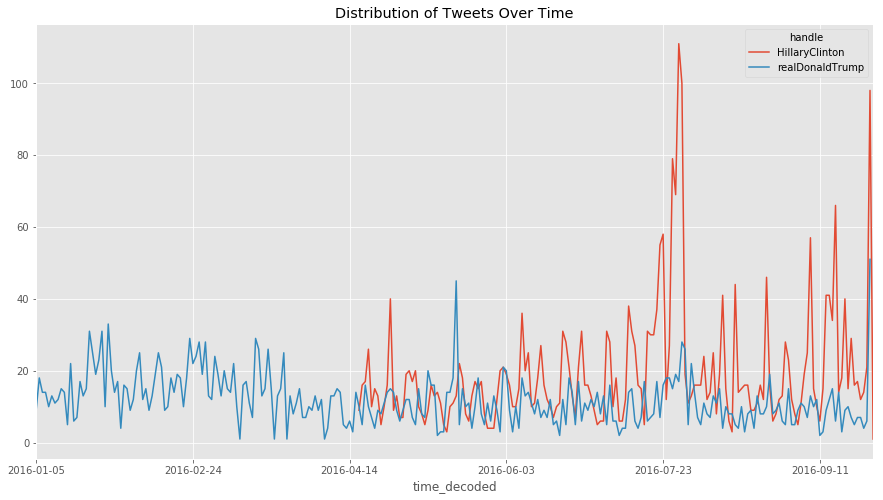

In [9]:
# Let's look at tweets over time
grouped.pivot(index='time_decoded', columns='handle', values='count').plot(figsize=(15, 8), title='Distribution of Tweets Over Time')

We can see that Trump started tweeting since the beginning of the year, and also the influx of Clinton tweets starting around July 16.

In [10]:
data['time'] = pd.to_datetime(data.time)
data['date']= data.time.apply(lambda x: x.date())
data['week']= data.time.apply(lambda x: x.isocalendar()[1])
data['tweet_hour'] = data.time.apply(lambda x: (x).hour)

# filter retweets and dates after 4/18/2016
data_ex_rt = data[(data['is_retweet'] == False) & (data['date'] >= pd.to_datetime('2016-04-18').date())]
data_ex_rt_daily = data_ex_rt.groupby(['date', 'handle']).size().unstack()
data_ex_rt_weekly = data_ex_rt.groupby(['week', 'handle']).size().unstack()

handle,HillaryClinton,realDonaldTrump
count,164.000000000000000,163.000000000000000
mean,16.006097560975611,9.950920245398773
std,14.675841737011542,6.256654414026949
min,1.000000000000000,2.000000000000000
25%,8.000000000000000,6.000000000000000
50%,11.000000000000000,9.000000000000000
75%,18.000000000000000,13.000000000000000
max,98.000000000000000,45.000000000000000


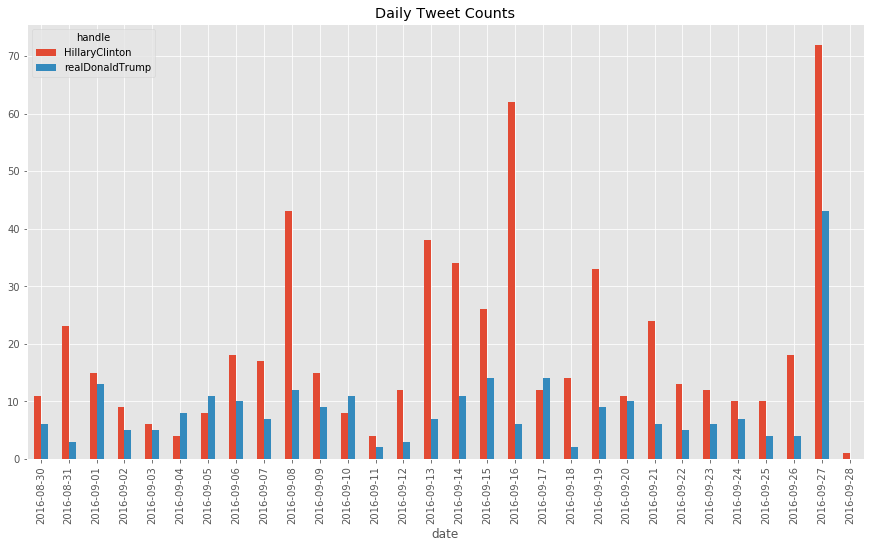

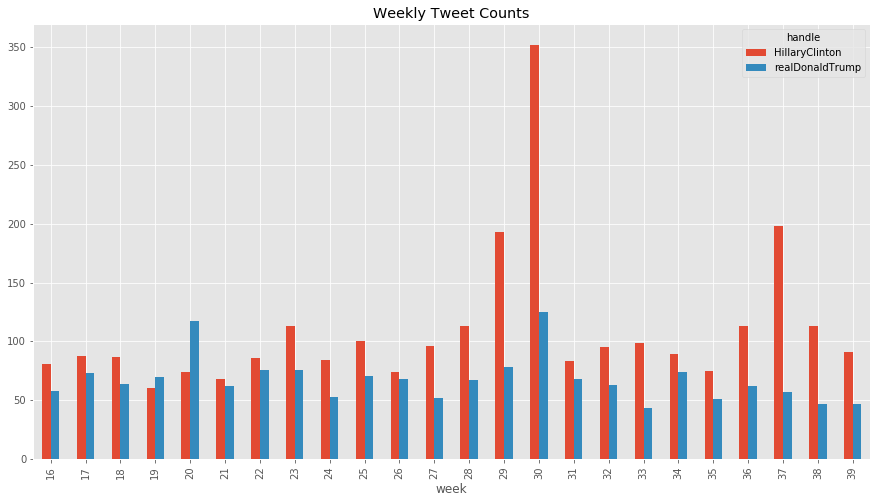

In [62]:
# plot the timeseries
data_ex_rt_daily.tail(30).plot(kind='bar', title='Daily Tweet Counts', figsize=(15, 8) )
data_ex_rt_weekly.plot(kind='bar', title='Weekly Tweet Counts', figsize=(15, 8))

data_ex_rt_daily.describe()

#### Number of tweets by the months

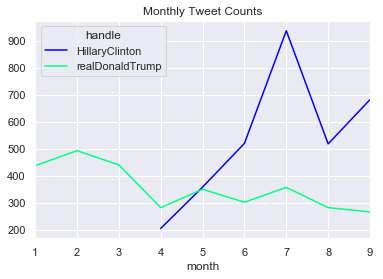

In [11]:
data['month'] = data['time'].apply(lambda x: x.month)
sns.set(font_scale=1)
monthly_tweets = data.groupby(['month', 'handle']).size().unstack()
monthly_tweets.plot(title='Monthly Tweet Counts', colormap='winter')

**Hillary Clinton** tweets start in april meanwhile **Donald Trump** has started in january that's why he have more tweets than **Clinton's**. 

#### When do candidates tweet?

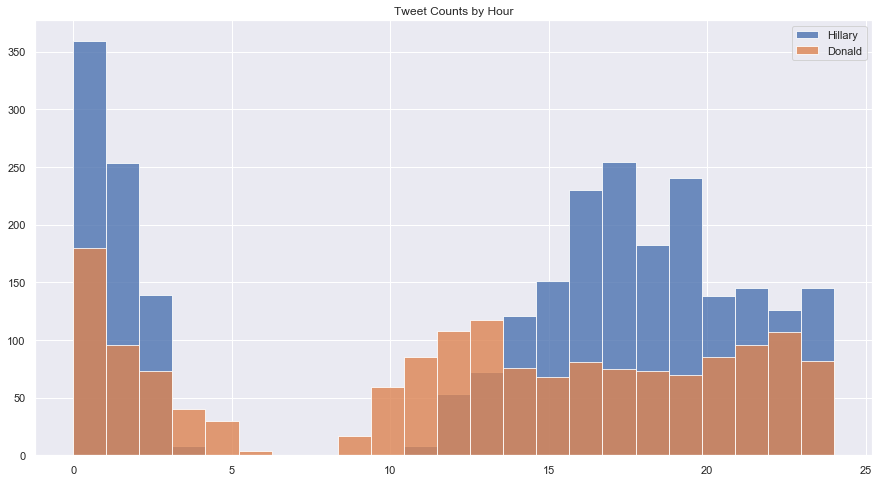

In [12]:
bins = np.linspace(0, 24, 24)
plt.figure(figsize=(15, 8))
plt.hist(data_ex_rt['tweet_hour'][data_ex_rt['handle']=='HillaryClinton'], bins, alpha=0.8, label="Hillary")
plt.hist(data_ex_rt['tweet_hour'][data_ex_rt['handle']=='realDonaldTrump'], bins, alpha=0.8, label="Donald")
plt.legend()
plt.title('Tweet Counts by Hour')
plt.show()

Moreover it's interesting to see the hourly tweets tendency, canditates tend to communicate more in the afternoon and the night .

####  Does time of tweet correlate with likes ?

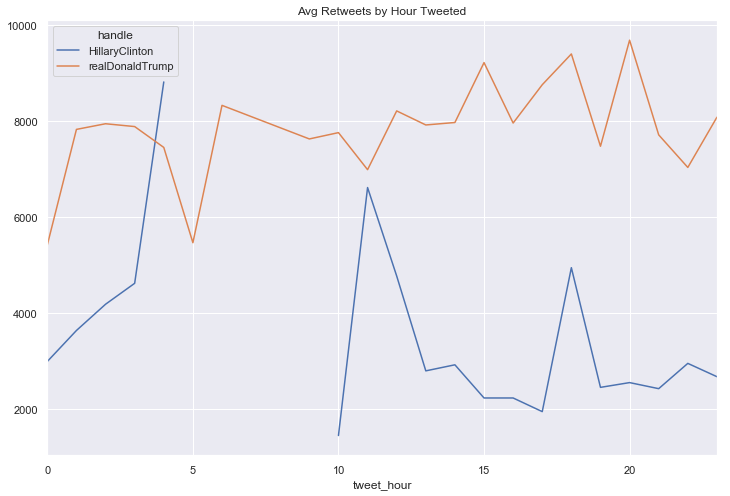

In [13]:
data_hour_retweets = data_ex_rt.groupby(['tweet_hour', 'handle']).apply(lambda x: np.mean(x.retweet_count)).unstack()
data_hour_retweets.plot(title='Avg Retweets by Hour Tweeted', figsize=(12, 8))

#### Does time of tweet correlate with likes ?

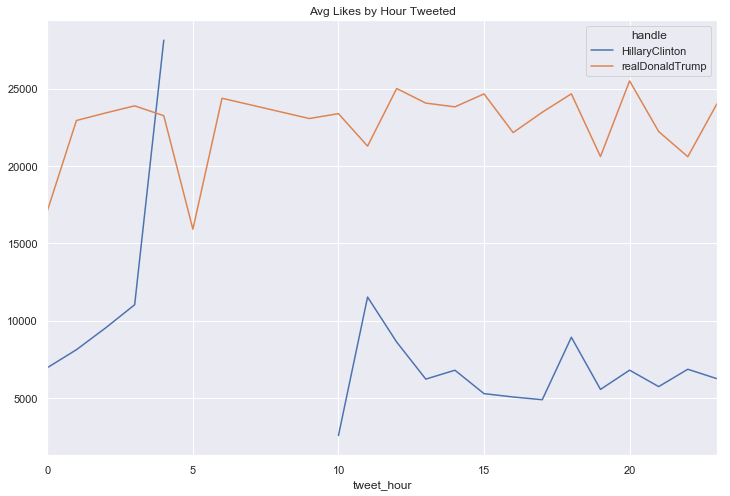

In [14]:
data_hour_likes = data_ex_rt.groupby(['tweet_hour', 'handle']).apply(lambda x: np.mean(x.favorite_count)).unstack()
data_hour_likes.plot(title='Avg Likes by Hour Tweeted', figsize=(12, 8))

 <a id="42"></a> <br>

### 4.2 Percentage of retweets
Now let's plot more interesting graphs and filter retweets:

[[Text(0, 0, 'Tweets'), Text(0, 0, 'Retweets')]]

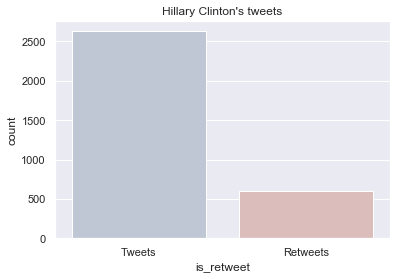

In [15]:
#Total number of original tweets and retweets for each of the contender
retweet_hc = data.loc[(data['handle']=='HillaryClinton'), ['is_retweet']]
retweet_dt = data.loc[(data['handle']=='realDonaldTrump'), ['is_retweet']]
ax1 = sns.countplot(retweet_hc['is_retweet'], palette='vlag')
ax1.set_title("Hillary Clinton's tweets")
ax1.set(xticklabels=["Tweets","Retweets"])

[[Text(0, 0, 'Tweets'), Text(0, 0, 'Retweets')]]

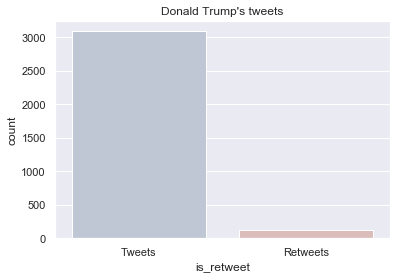

In [16]:
ax2 = sns.countplot(retweet_dt['is_retweet'], palette='vlag')
ax2.set_title("Donald Trump's tweets")
ax2.set(xticklabels=["Tweets","Retweets"])

From this we can say that **Donald Trump** has used a little a bit more twitter than **Hillary Clinton** but **Clinton's** tweets have been more retweeted than **Trump's** one.

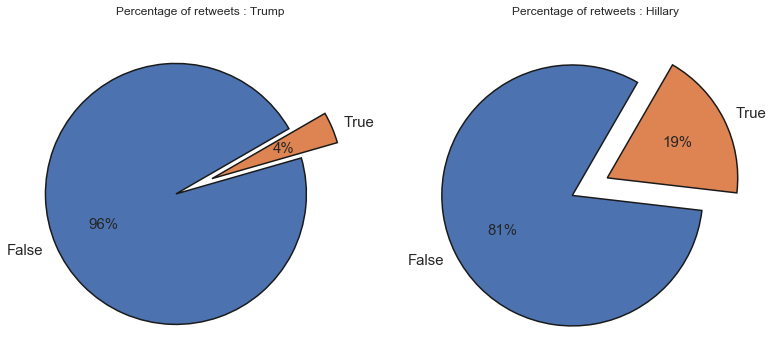

In [17]:
plt.figure(figsize = (13,6))
plt.subplot(121)
data[data["handle"] ==
       "realDonaldTrump"]["is_retweet"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1.5,
                                                                              "edgecolor" : "k"},
                                                                fontsize = 15,
                                                                explode = [.2,0.1],
                                                                startangle = 30
                                                               )
plt.ylabel("")
plt.title("Percentage of retweets : Trump")

plt.subplot(122)
data[data["handle"] ==
       "HillaryClinton"]["is_retweet"].value_counts().plot.pie(autopct = "%1.0f%%",
                                                                wedgeprops = {"linewidth" : 1.5,
                                                                              "edgecolor" : "k"},
                                                                fontsize = 15,
                                                                explode = [.2,0.1],
                                                                startangle = 60
                                                               )
plt.ylabel("")
plt.title("Percentage of retweets : Hillary")
plt.show()

 <a id="43"></a> <br>
### 4.3 Tweets Language

In [18]:
data.lang.value_counts()

en     6248
es      105
und      82
da        3
tl        2
fr        2
et        1
fi        1
Name: lang, dtype: int64

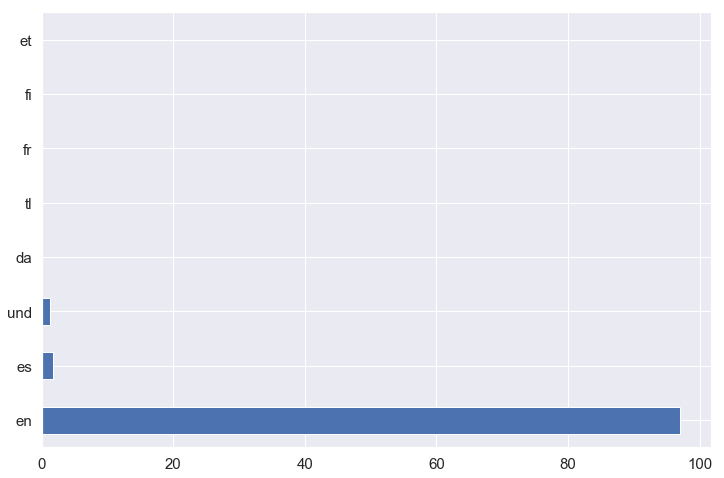

In [19]:
lang_total = data.lang.value_counts().sum()
percent = data.lang.value_counts() / lang_total
percent *= 100
pie_chart = pd.Series(percent, index=['en','es','und','da','tl','fr','fi','et'], name='Languages')
pie_chart.plot.barh(fontsize=15, figsize=(12, 8))

As we can see, most of the tweets used by the two candidates were written in English. But we have more than 100 tweets in Spanish :

In [20]:
data.handle[data.lang=='es'].value_counts()

HillaryClinton     102
realDonaldTrump      3
Name: handle, dtype: int64

This does make sense because Clinton's campaign has made efforts to mobilize Latino voters who will be critical in the general election. In addition, she has a strong network of Latino leaders and activists.

 <a id="44"></a> <br>

### 4.4 Original authors of retweets

In [21]:
#trump tweets with retweets
tweets_trump_retweets   = (data[(data["handle"] == "realDonaldTrump") &
                                  (data["is_retweet"] == True)].reset_index()
                                  .drop(columns = ["index"],axis = 1))


#hillary tweets with retweets
tweets_hillary_retweets  = (data[(data["handle"] == "HillaryClinton") &
                            (data["is_retweet"] == True)].reset_index()
                              .drop(columns = ["index"],axis = 1))

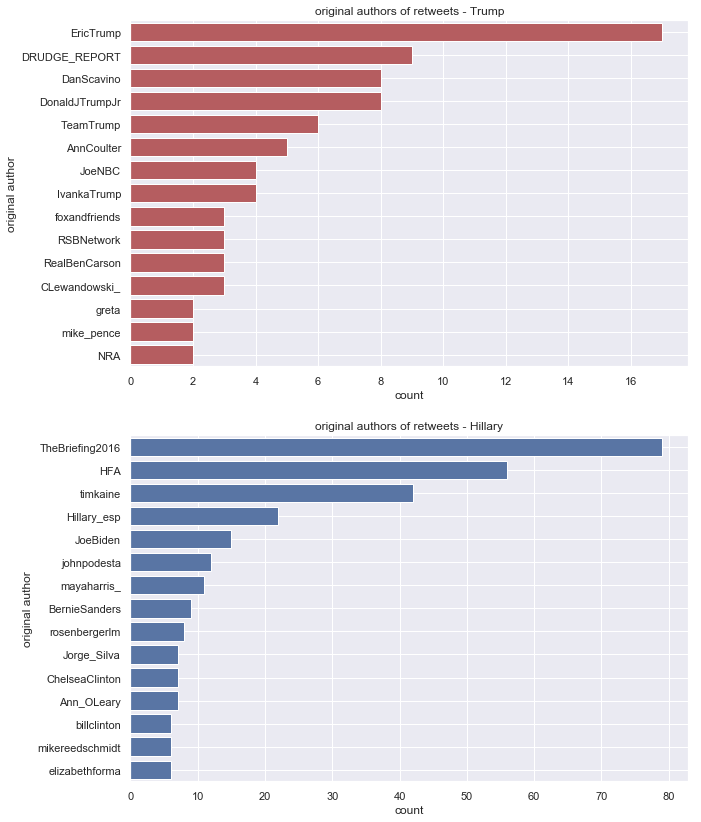

In [22]:
plt.figure(figsize = (10,14))

plt.subplot(211)
authors = tweets_trump_retweets["original_author"].value_counts().reset_index()
sns.barplot(y = authors["index"][:15] , 
            x = authors["original_author"][:15],
            color = "r")
plt.grid(True)
plt.xlabel("count")
plt.ylabel("original author")
plt.title("original authors of retweets - Trump")

plt.subplot(212)
authors1 = tweets_hillary_retweets["original_author"].value_counts().reset_index()
sns.barplot(y = authors1["index"][:15] , 
            x = authors1["original_author"][:15],
            color = "b")
plt.grid(True)
plt.xlabel("count")
plt.ylabel("original author")
plt.title("original authors of retweets - Hillary")
plt.show()

#### Nan Values :

How many missing values do we have (NaN)?

In [23]:
missing_values_count = data.isnull().sum()

# Top ten columns with Nan values
missing_values_count.sort_values(ascending=False)[0:10]

longitude                 6432
latitude                  6432
in_reply_to_status_id     6242
place_full_name           6240
place_contained_within    6240
place_id                  6240
place_name                6240
place_type                6240
place_country_code        6240
place_country             6240
dtype: int64

In [24]:
# how many total missing values do we have?
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

44.98302114141746

That's a lot! Fortunately those features are not so important in our analysis.

 <a id="5"></a> <br>
# 5. Data Analysis


#### Extract Trump's and Clinton"s Tweets

In [25]:
trump_tweets = [' '.join(t.strip().split()) for t in data[data.handle=='realDonaldTrump'].text.tolist()]
clinton_tweets = [' '.join(t.strip().split()) for t in data[data.handle=='HillaryClinton'].text.tolist()]

#### Exclude stop words

In [26]:
stopwords = set(STOPWORDS)
stopwords.add("http")
stopwords.add("https")
stopwords.add("amp")
stopwords.add("CO")
stopwords.add("Trump")
stopwords.add("Trump2016")
stopwords.add("Donald")
stopwords.add("Clinton")
stopwords.add("Hillary")
stopwords.add("Hillary'")
stopwords.add("realDonaldTrump")
stopwords.add("will")
stopwords.add("say")
stopwords.add("said")
stopwords.add("let")
stopwords.add("vote")
stopwords.add("now")
stopwords.add("go")

 <a id="51"></a> <br>
### 5.1 Word Cloud : 

- Hillary Clinton's Word Cloud :

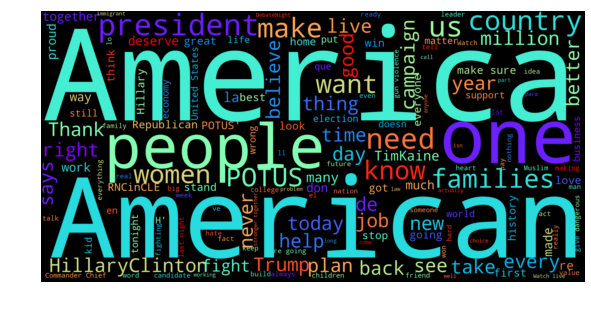

In [27]:
wordcloud_hc = WordCloud(max_font_size=100, max_words=1000, scale=6, relative_scaling=.6,stopwords=stopwords, background_color="black", colormap = "rainbow").generate(str(clinton_tweets))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_hc,interpolation="bilinear")
plt.axis("off")
plt.show()

- Donald Trump's Word Cloud :

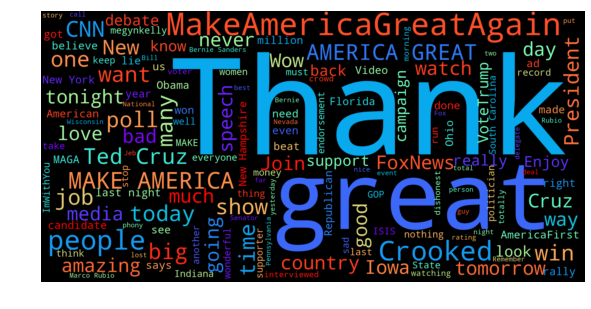

In [28]:
wordcloud_tp = WordCloud(max_font_size=100, max_words=1000, scale=6, relative_scaling=.6,stopwords=stopwords, background_color="black", colormap = "rainbow").generate(str(trump_tweets))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_tp,interpolation="bilinear")
plt.axis("off")
plt.show()

 <a id="52"></a> <br>
### 5.2 Mentions : 

#### Extract mentions from tweets

In [29]:
def get_mentions(txt):
    mention = re.findall('(\@[A-Za-z_]+)', txt)
    if mention:
        return mention
    else:
        return ""

In [30]:
# We'll take again just the tweets and not the re-tweets
data_r = data[data['is_retweet'] == False].reset_index()
data_r['top_mentions'] = data_r['text'].apply(lambda x: get_mentions(x))

mention_list_trump = []
mention_list_clinton = []

for n in range(len(data_r['top_mentions'])):
    if data_r['handle'][n] == 'realDonaldTrump':
        mention_list_trump += data_r['top_mentions'][n]
    elif data_r['handle'][n] == 'HillaryClinton':
        mention_list_clinton += data_r['top_mentions'][n]

#### Graph mentions most used by candidates (top 10)

Text(0.5, 1.0, "Clinton's 6 most used mentions")

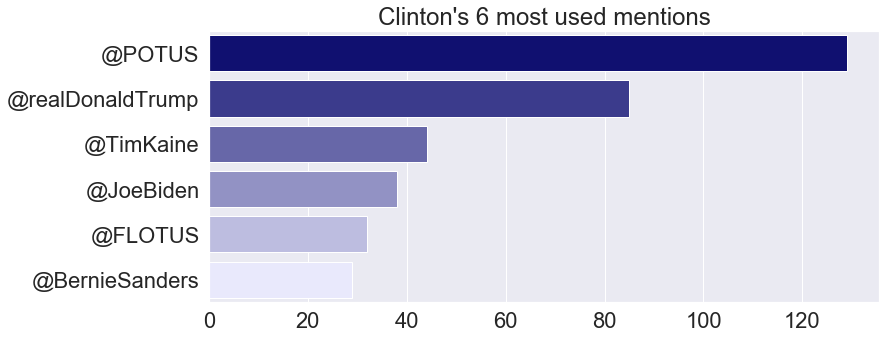

In [31]:
data2 = Series(mention_list_clinton).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12, 5))
sns.barplot(x=data2, y=data2.index, orient='h', palette=sns.light_palette("navy",reverse=True)).set_title("Clinton's 6 most used mentions")

While **Hillary Clinton** only mentions other Twitter users in every fifth tweet, most of the user mentions are for **@POTUS** (+125 mentions) then we have the **@realDonaldTrump** who is more than any other Twitter user mentioned on her account, including  **@TimKaine** and **@JoeBiden**.

Text(0.5, 1.0, "Trump's 6 most used mentions")

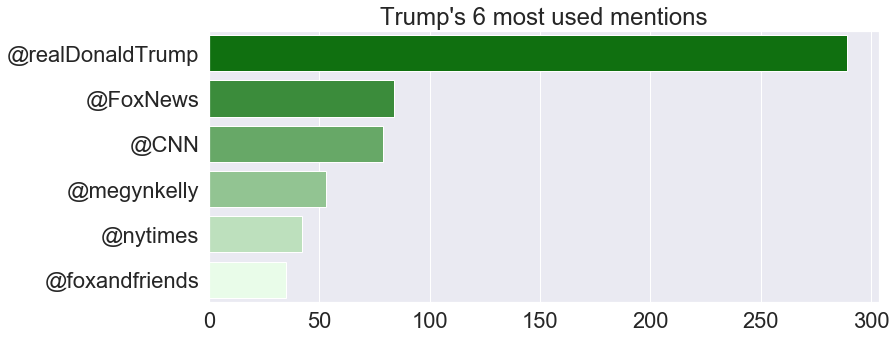

In [32]:
data1 = Series(mention_list_trump).value_counts().head(n=6)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12, 5))
sns.barplot(x=data1, y=data1.index, orient='h', palette=sns.light_palette("green",reverse=True)).set_title("Trump's 6 most used mentions")

Donald Trump, on the other hand, does not mention **@HillaryClinton's** Twitter handle. **Donald Trump** consistently mentions other Twitter users in two-thirds of his tweets, often mentioning his own account **@realDonaldTrump** (+280 mentions), but also **@FoxNews** (+70 mentions), **@CNN** (+60) and Fox News anchor **@MegynKelly** (+52 mentions) for their allegedly biased and unfair reporting.

- Seems like one thing both candidates had in common was their frequent mention of Trump. Surprinsingly, while Trump was Hillary's 2nd most mentioned account, she was not on Trump's list.

- It remains to be seen which strategy is better: engaging with and mentioning your opponent’s Twitter account or simply ignoring it.

 <a id="53"></a> <br>
### 5.2 Hashtags Wars : 

In [33]:
def get_hashtags(txt):
    hashtag = re.findall('(\#[A-Za-z_]+)', txt)
    if hashtag:
        return hashtag
    else:
        return ""

In [34]:
data_r['top_hashtags'] = data_r['text'].apply(lambda x: get_hashtags(x))

hashtags_list_trump = []
hashtags_list_clinton = []

for n in range(len(data_r['top_hashtags'])):
    if data_r['handle'][n] == 'realDonaldTrump':
        hashtags_list_trump += data_r['top_hashtags'][n]
    elif data_r['handle'][n] == 'HillaryClinton':
        hashtags_list_clinton += data_r['top_hashtags'][n]

Text(0.5, 1.0, 'Popular hashtags used by Clinton')

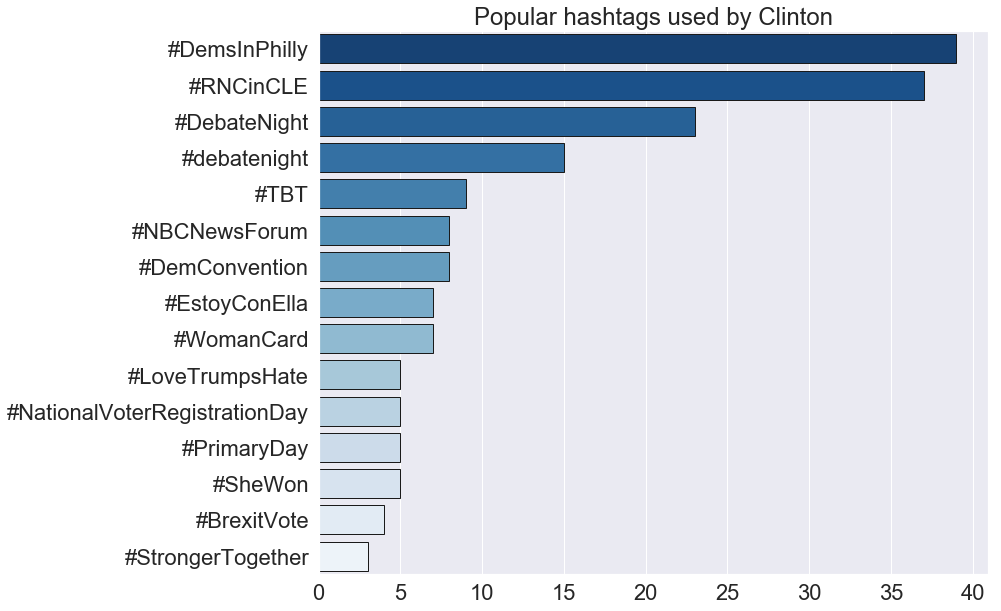

In [35]:
data4 = Series(hashtags_list_clinton).value_counts().head(n=15)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12,10))
sns.barplot(x=data4, y=data4.index, orient='h', palette="Blues_r",linewidth = 1 , edgecolor = "k"* 25).set_title("Popular hashtags used by Clinton")

**Hillary Clinton** is more sparing, using hashtags in only 18% of her tweets; most commonly **#DemsInPhilly** and **#DebateNight**. She has also used hashtags to react to her opponent during the Republican National Convention (**#RNCinCLE** used 35 times).

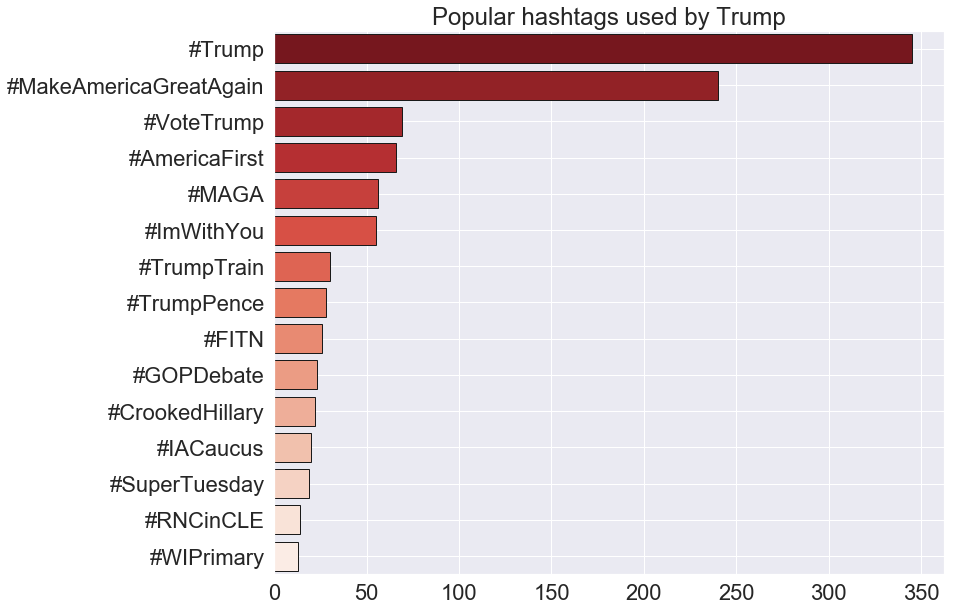

In [36]:
data3 = Series(hashtags_list_trump).value_counts().head(n=15)
sns.set_style("white")
sns.set(font_scale=2)
plt.figure(figsize=(12, 10))
sns.barplot(x=data3, y=data3.index, orient='h', palette="Reds_r",linewidth = 1 , edgecolor = "k"* 25).set_title("Popular hashtags used by Trump")
plt.grid(True)

**Donald Trump** includes a hashtag in almost every other tweet, including **#Trump**, used +340 times, and **#MakeAmericaGreatAgain**, used 246 times. 

- It seems Trump was much more fond of hashtags than Hillary, using his favorite hashtag (#Trump) almost 9x more than she used her favorite (#DemsInPhilly).

#### Network of hashtags

In [37]:
B=nx.Graph() #create an empty graph

data6 = Series(hashtags_list_trump).value_counts().head(n=40)
data7 = Series(hashtags_list_clinton).value_counts().head(n=40)

for hashtag1 in data6.index: #for each user loop over the hashtags they use
    B.add_edge('D.Trump',hashtag1) #add the edge Candidate<->hashtag
    
for hashtag2 in data7.index: #for each user loop over the hashtags they use
    B.add_edge('H.Clinton',hashtag2) #add the edge Candidate<->hashtag

In [38]:
B.number_of_nodes()

80

In [39]:
B.number_of_edges()

80

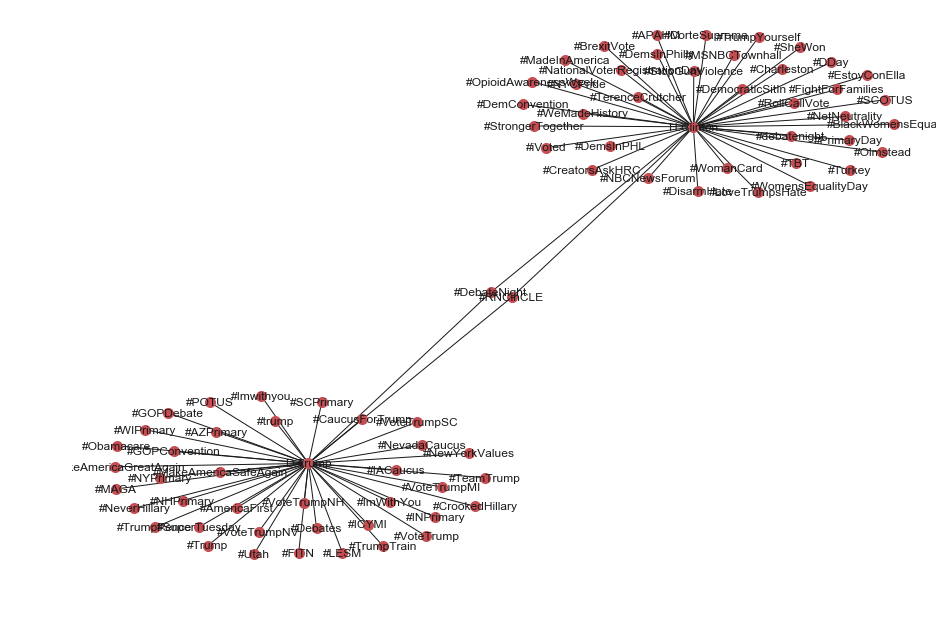

In [40]:
plt.figure(figsize=(12,8))
nx.draw_spring(B, with_labels=True, node_size= 100, font_size=12)
plt.show()

Hashtag classifcation via network of co-occurrence. Network of top 40 hashtags of each candidate. Nodes of the network represent hashtags and an edge is drawn between them and the candidate. Two main clusters are visible, corresponding to Trump / Clinton.

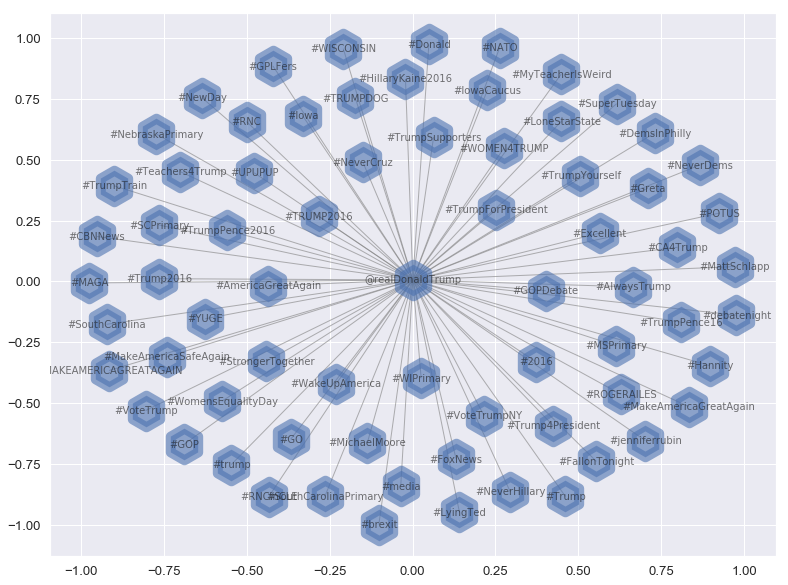

In [53]:
accounts = data_r['text'].str.extractall(r'(\@\w+)')[0].reset_index()[["level_0",0]]
hash_tag = data_r['text'].str.extractall(r'(\#\w+)')[0].reset_index()[["level_0",0]]
lf = hash_tag.merge(accounts,left_on = "level_0",right_on = "level_0",how = "left")[["0_x","0_y"]]
rt = accounts.merge(hash_tag,left_on = "level_0",right_on = "level_0",how = "left")[["0_x","0_y"]]
lf = lf.rename(columns = {"0_y" : "accs","0_x" : "hashs"})[["hashs","accs"]]
rt = rt.rename(columns = {"0_x" : "accs","0_y" : "hashs"})[["hashs","accs"]]
newdat = pd.concat([lf,rt],axis = 0)
newdat

import networkx as nx

def connect_hash_acc(word,connect_type) :
      
    df = newdat[newdat["accs"] == word] 
    df = df[df["hashs"].notnull()]
        
    G  = nx.from_pandas_edgelist(df,"hashs","accs")
    plt.figure(figsize = (13,10))
    nx.draw_networkx(G,with_labels = True,font_size = 10,
                     font_color = "k",
                     font_family  = "DejaVu Sans",
                     node_shape  = "h",node_color = "b",
                     node_size = 1000,linewidths = 10,
                     edge_color = "grey",alpha = .6)
    

connect_hash_acc("@realDonaldTrump","account_to_hashtag")

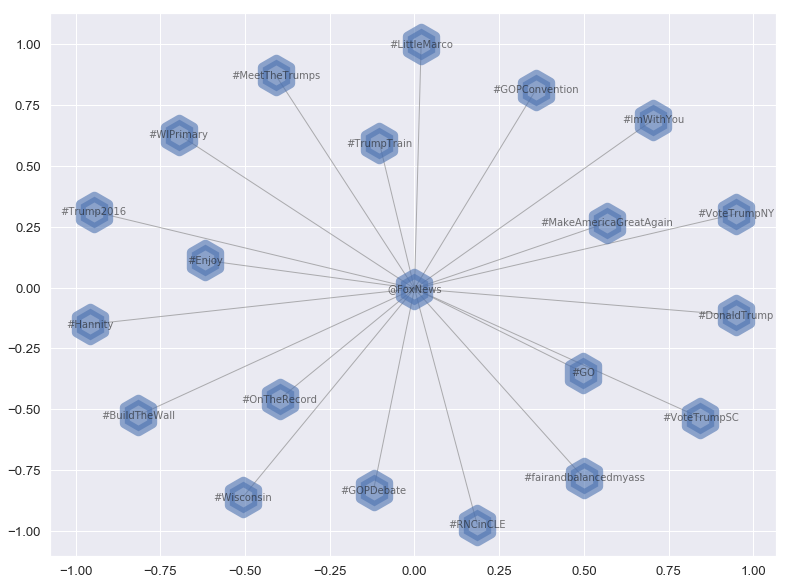

In [55]:
connect_hash_acc("@FoxNews","account_to_hashtag")

 <a id="6"></a> <br>
# 6. Sentiment Analysis

#### Categorize the text column into Positive and Negative sentiments using TextBlob
The TextBlob package contains several sentiment lexicons in the sentiments dataset.

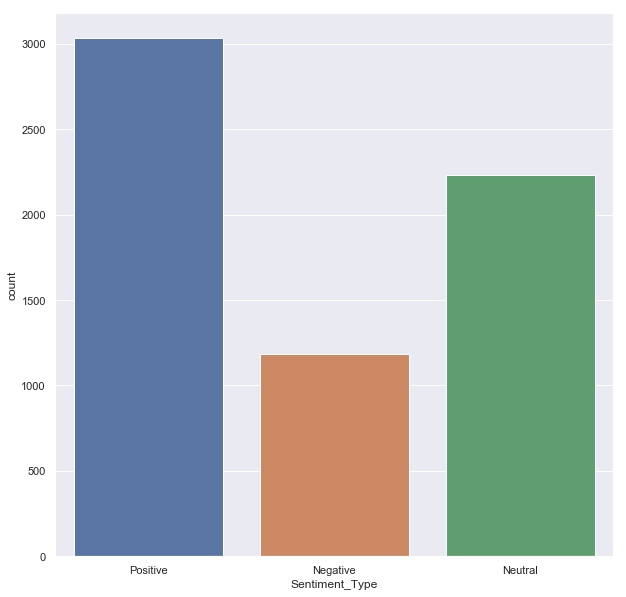

In [45]:
bloblist_desc = list()

df_tweet_descr_str=data['text'].astype(str)
for row in df_tweet_descr_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

    
def f(df_tweet_polarity_desc):
    if df_tweet_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_polarity_desc['Sentiment_Type'] = df_tweet_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
sns.set(font_scale=1)
ax = sns.countplot(x="Sentiment_Type", data=df_tweet_polarity_desc)

Unlike what we could have think, most of the tweets are postive and neutral. Now I'll try to focus on each candidate separately.

 ### Clinton Sentiment analysis

In [42]:
tweet_clinton = data.loc[(data['handle']=='HillaryClinton'), ['text']]
bloblist_desc = list()

df_tweet_clinton_str=tweet_clinton['text'].astype(str)
for row in df_tweet_clinton_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_clinton_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

    
def f(df_tweet_clinton_polarity_desc):
    if df_tweet_clinton_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_clinton_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_clinton_polarity_desc['Sentiment_Type_Clinton'] = df_tweet_clinton_polarity_desc.apply(f, axis=1)


It's interesting to see that **Hillary Clinton** has a large number of neutral tweets , it maybe was a choice for her campain.

### Trump Sentiment analysis

In [43]:
tweet_trump = data.loc[(data['handle']=='realDonaldTrump'), ['text']]
bloblist_desc = list()

df_tweet_trump_str=tweet_trump['text'].astype(str)
for row in df_tweet_trump_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_tweet_trump_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])

    
def f(df_tweet_trump_polarity_desc):
    if df_tweet_trump_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif df_tweet_trump_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

df_tweet_trump_polarity_desc['Sentiment_Type_Trump'] = df_tweet_trump_polarity_desc.apply(f, axis=1)

### Plot

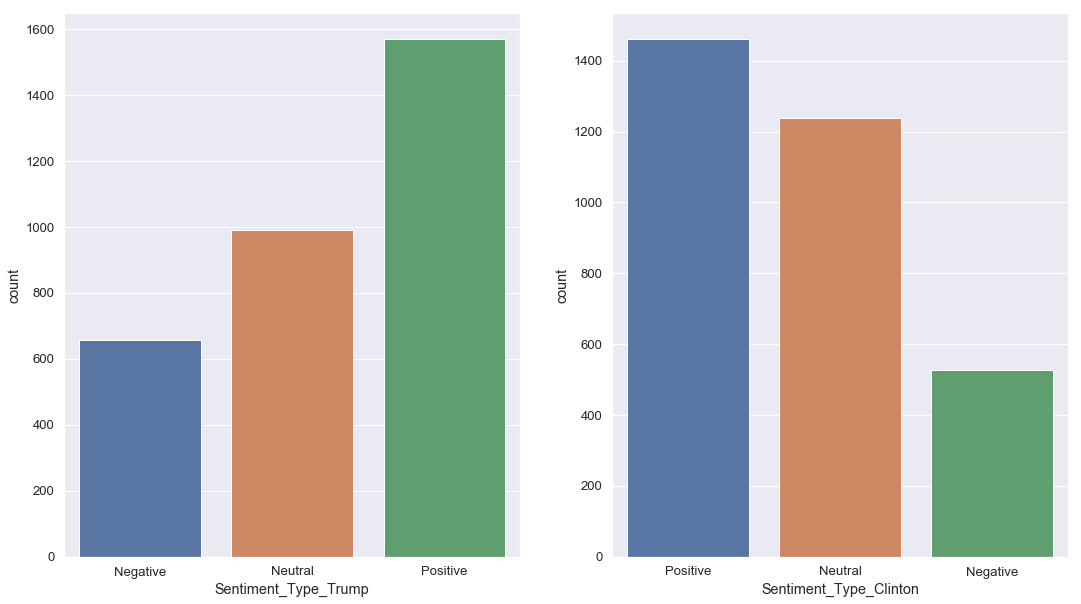

In [47]:
fig, ax =plt.subplots(1,2,figsize=(18,10))
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
sns.countplot(x="Sentiment_Type_Trump", data=df_tweet_trump_polarity_desc,  ax=ax[0])
sns.countplot(x="Sentiment_Type_Clinton", data=df_tweet_clinton_polarity_desc, ax=ax[1])
fig.show()

It's really interesting to see that **Donald Trump** has a really large number of positive tweets, their represent nearly the double of his neutral or negative tweets.

<a id="7"></a> <br>
# 7. Impersonating the candidates

Thanks to **Markovify**, we can use a Markov Chain generator to create synthetic tweets based on an existing library of actual tweets.

In [71]:
import markovify as mk

tweets = data[data.is_retweet == False]
tweets = tweets[['handle', 'text', 'is_retweet']]

def tweet(tweeter):
    doc = tweets[tweets.handle.str.contains(tweeter)].text.tolist()
    text_model = mk.Text(doc) 
    print('\n', tweeter)
    for i in range(8):
        print(text_model.make_sentence(tries=100))
        
tweet('Hillary')
tweet('Donald')


 Hillary
On the backs of American families are mourning.
The people taking care of our society is how we treat our fellow human beings, especially those who hate. https://t.co/jnFMG6J5Ac
We can only confront a challenge like Zika when we come together, there's nothing we can't heal. https://t.co/2eutCA4R6C
Here's why Donald Trump could do with that money. https://t.co/LeDSdcpySI
Watch live as @CoryBooker takes the stage with @elizabethforma in Ohio: https://t.co/1MHHD9Zmd4
Watch President Obama &amp; Vice President @JoeBiden had the keys to our national debt.
There’s no doubt about it—Donald Trump is unfit to be Commander-in-Chief.
The terrorist in Orlando targeted LGBT Americans can get involved in this campaign in Spanish.

 Donald
I love watching what he is doing a big day for New Hampshire.
See her dumb tweet “when a woman is Rowanne Brewer Lane to have brought the subject of illegal immigration back into the discussion.
I would like to express my warmest regards, best wishes and 

By default, the **make_sentence** method tries a maximum of 10 times per invocation, to make a sentence that does not overlap too much with the original text. To increase or decrease the number of attempts, use the **tries** keyword argument.

In [69]:
def subj_tweet(tweeter, subject):
    doc = tweets[tweets.handle.str.contains(tweeter)].text.tolist()
    text_model = mk.Text(doc) 
    print('\n', tweeter)
    for i in range(8):
        print(text_model.make_sentence_with_start(subject, strict=False))

subj_tweet('Hillary', 'They')
subj_tweet('Donald', 'We')


 Hillary
They don’t just want us to solve them.
They are trying to scam America the clean energy superpower of the iceberg. https://t.co/4tYa2Y4nN9
They say your friends on Facebook: https://t.co/ggUNnLHE4B
They deserve our respect and our society—at home and around the world—1.5 billion men, women, and children—from entering the U.S. &amp; deport millions of immigrants. https://t.co/8KYse7wy4P
They don’t just get to say with one hand and give out pink slips with the Russian billionaires with whom they met?
They say your friends on Facebook: Hillary leads a roundtable discussion with working families in need: https://t.co/sSYTbQMndP -H
They say your friends do the same.
They deserve our thanks.

 Donald
We do not like or respect women, when they knew it was cancelled.
We cannot admit people into the words I say, I would have attended the #SnowflakeGardenBrunch- here w/ Governor @TerryBranstad. https://t.co/mgLh9Im9QI
We just had a great job done - it was cancelled.
We could only get w

#### Sometimes this works and it helps point the fake tweets in a certain direction.

<a id="8"></a> <br>
# 8. Predicting who said it: Trump or Clinton

In [79]:
#Create new dataframe for prediction model with candidate name (as label) and tweets (as message):
data['message'] = data['text'].apply(lambda x: x.lower().split('http')[0])

messages = data[['handle','message']]

In [80]:
print(messages[:5])

           handle                                            message
0  HillaryClinton  the question in this election: who can put the...
1  HillaryClinton  last night, donald trump said not paying taxes...
2  HillaryClinton  couldn't be more proud of @hillaryclinton. her...
3  HillaryClinton  if we stand together, there's nothing we can't...
4  HillaryClinton  both candidates were asked about how they'd co...


In [81]:
def split_into_tokens(message):
    message = message  # convert bytes into proper unicode
    return TextBlob(message).words

In [82]:
messages.message.head()

0    the question in this election: who can put the...
1    last night, donald trump said not paying taxes...
2    couldn't be more proud of @hillaryclinton. her...
3    if we stand together, there's nothing we can't...
4    both candidates were asked about how they'd co...
Name: message, dtype: object

In [83]:
messages.message.head().apply(split_into_tokens)

0    [the, question, in, this, election, who, can, ...
1    [last, night, donald, trump, said, not, paying...
2    [could, n't, be, more, proud, of, hillaryclint...
3    [if, we, stand, together, there, 's, nothing, ...
4    [both, candidates, were, asked, about, how, th...
Name: message, dtype: object

In [88]:
def split_into_lemmas(message):
    message = message.lower()
    words = TextBlob(message).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words]

messages.message.head().apply(split_into_lemmas)

0    [the, question, in, this, election, who, can, ...
1    [last, night, donald, trump, said, not, paying...
2    [could, n't, be, more, proud, of, hillaryclint...
3    [if, we, stand, together, there, 's, nothing, ...
4    [both, candidate, were, asked, about, how, the...
Name: message, dtype: object

In [89]:
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(messages['message'])
print(len(bow_transformer.vocabulary_))
print(bow_transformer.get_feature_names()[:10])

9432
["'16", "'84", "'american", "'amnesty", "'as", "'best", "'black", "'cease", "'cnbc", "'d"]


In [90]:
messages_bow = bow_transformer.transform(messages['message'])
print('sparse matrix shape:', messages_bow.shape)
print('number of non-zeros:', messages_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

sparse matrix shape: (6444, 9432)
number of non-zeros: 104206
sparsity: 0.17%


In [93]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['the']])
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['hannity']])

1.8929045788699637
7.979300446145233


In [94]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(6444, 9432)


In [99]:
spam_detector = MultinomialNB().fit(messages_tfidf, messages['handle'])
all_predictions = spam_detector.predict(messages_tfidf)
tr_acc = accuracy_score(messages['handle'], all_predictions)
print("Accuracy on training set:  %.2f%%" % (100 * tr_acc))

Accuracy on training set:  96.34%


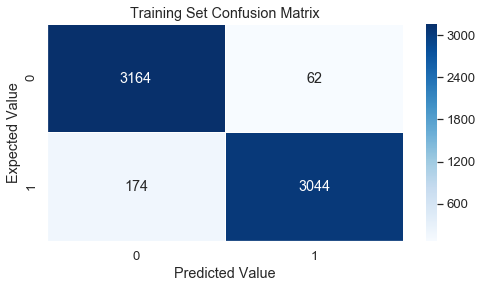

In [118]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(messages['handle'], all_predictions), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Set Confusion Matrix')
sns.despine(ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

In [120]:
msg_train, msg_test, label_train, label_test = \
    train_test_split(messages['message'], messages['handle'], test_size=0.2, random_state=1)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

5155 1289 6444


In [127]:
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=split_into_lemmas)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

scores = cross_val_score(pipeline,  # steps to convert raw messages into models
                         msg_train,  # training data
                         label_train,  # training labels
                         cv=10,  # split data randomly into 10 parts: 9 for training, 1 for scoring
                         scoring='accuracy',  # which scoring metric?
                         n_jobs=-1,  # -1 = use all cores "faster"
                         )
print(scores, '\n')
print('Mean score:', scores.mean())
print('Stdev:', scores.std())

[0.9244 0.9264 0.9399 0.9147 0.9264 0.9186 0.905  0.8951 0.9261 0.9047] 

Mean score: 0.9181311287268004
Stdev: 0.012670848631606169


In [137]:
%time nb_detector = pipeline.fit(msg_train, label_train)
predictions = nb_detector.predict(msg_test)

Wall time: 2.43 s


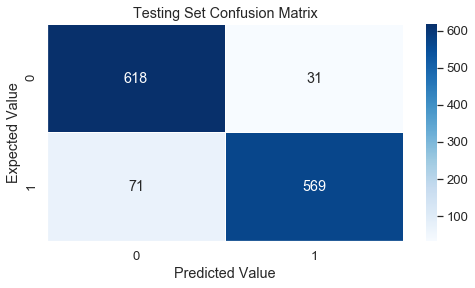

In [160]:
fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(confusion_matrix(label_test, predictions), annot=True, linewidths=.5, ax=ax, cmap="Blues", fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Testing Set Confusion Matrix')
sns.despine(ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

### Testing our prediction model :

In [152]:
my_1st_tweet = 'We have to build an economy that works for everyone, not just those at the top.'
my_2nd_tweet = 'My lawyers want to sue the failing @nytimes so badly for irresponsible intent.'

In [147]:
print("Tweet #1:", "'",my_1st_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([my_1st_tweet])[0])), "sure this was tweeted by", nb_detector.predict([my_1st_tweet])[0])

Tweet #1: ' We have to build an economy that works for everyone, not just those at the top. '  
 
 I'm about 89% sure this was tweeted by HillaryClinton


In [153]:
print("Tweet #2:", "'",my_2nd_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([my_2nd_tweet])[0])), "sure this was tweeted by", nb_detector.predict([my_2nd_tweet])[0])

Tweet #2: ' My lawyers want to sue the failing @nytimes so badly for irresponsible intent. '  
 
 I'm about 88% sure this was tweeted by realDonaldTrump


### Enter your tweet!
- Write your tweet in the cell below
- Run the cell (or the notebook, if you haven't yet)
- Check out the results!

In [159]:
your_tweet = 'ENTER YOUR TWEET HERE, INSIDE THE QUOTES'

# ---- this part stays the same----
if your_tweet == 'ENTER YOUR TWEET HERE, INSIDE THE QUOTES':
    pass
else:
    print("Tweet #1:", "'",your_tweet, "'", ' \n \n', "I'm about %.0f%%" % (100 * max(nb_detector.predict_proba([your_tweet])[0])), "sure this was tweeted by", nb_detector.predict([your_tweet])[0])